2.2.6.  Биномиальное распределение

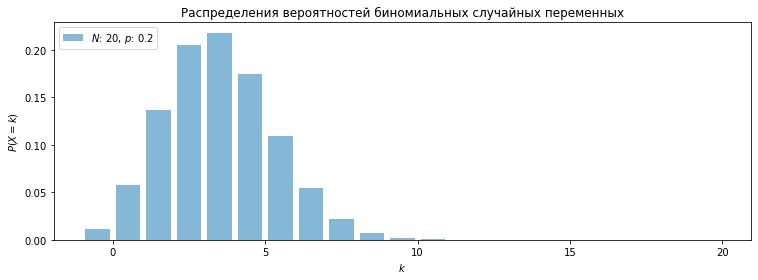

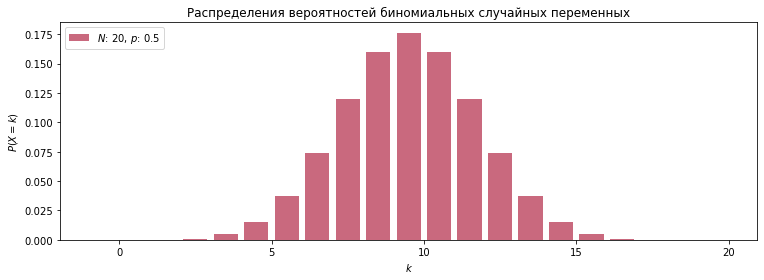

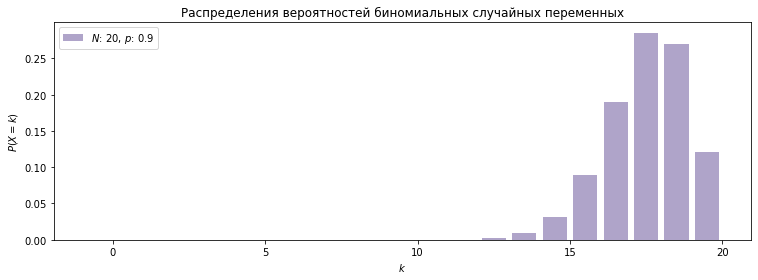

In [1]:
%matplotlib inline
import pymc as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import numpy as np

figsize(12.5, 4)
import scipy.stats as stats
binomial = stats.binom
parameters = [(20, .2),(20, .5), (20, .9)]
colors = ["#348ABD", "#A60628", '#7A68A6']
for i in range(3):
    N,p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color = colors[i],
            alpha = 0.6,
            label = '$N$: %d, $p$: %.1f' %(N, p),
            linewidth = 3
            )
    plt.title("Распределения вероятностей биномиальных случайных переменных")
    plt.legend(loc="upper left")
#plt.xlim(0, 10.5)
    plt.xlabel("$k$")
    plt.ylabel("$P(X = k)$")
    plt.show()

2.2.7.  Моделируем пример с мошенничеством среди студентов

In [26]:
import pymc as pm
N = 100 # число студентов
p = pm.Uniform("freq_cheating", 0, 1) # априорная фактическая доля мошенников
true_answers = pm.Bernoulli("truths", p, size=N) # априорное распределение правильных ответов

In [20]:
true_answers.value

array([False,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False])

In [16]:
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N) #априорное распределение  результатов падения 100 монет 
print (first_coin_flips.value)

[ True False False  True  True  True False  True  True False  True  True
  True False False False False  True  True  True False  True  True  True
 False  True  True  True  True False  True False  True  True  True  True
  True False  True False  True False False False  True False False  True
 False  True False False  True  True  True  True  True  True False False
  True False  True  True False  True  True  True  True False  True False
  True  True False False False  True  True False False  True  True  True
  True False  True  True False  True  True  True False  True False False
  True False  True  True]


In [21]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)

In [22]:
@pm.deterministic
def observed_proportion(t_a=true_answers,
                        fc=first_coin_flips,
                        sc=second_coin_flips):
    observed = fc*t_a + (1-fc)*sc # конф-алгоритм
    return observed.sum() / float(N) # доля мошенников

In [6]:
observed_proportion.value

0.37

In [23]:
X = 35
observations = pm.Binomial("obs", N, observed_proportion, observed=True,
                           value=X)

In [24]:
model = pm.Model([p, true_answers, first_coin_flips,
                  second_coin_flips, observed_proportion, observations])
# Будет объяснено в главе 3
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 20.2 sec

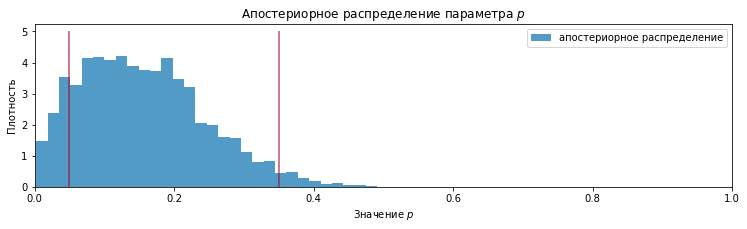

In [25]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", density=True,
         alpha=0.85, bins=30, label=u"апостериорное распределение",
         color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], color='#A60628', alpha=0.7)
plt.xlim(0, 1)
plt.xlabel("Значение $p$")
plt.ylabel("Плотность")
plt.title("Апостериорное распределение параметра $p$")
plt.legend();

In [2]:
?? plt.vlines

Object ` vlines` not found.


2.2.8.  Альтернативная модель PyMC

In [29]:
p = pm. Uniform('freq_cheating', 0, 1)

@pm.deterministic
def p_skewed (p = p):
    return 0.5*p + 0.25

In [30]:
yes_responses = pm.Binomial("number_cheaters", 100, p_skewed,
                            value=35, observed=True)

# Далее добавляем все интересующие нас переменные 
#в контейнер Model и запускаем для модели наш алгоритм 
#а-ля «черный ящик». Получившееся апостериорное 
#распределение показано на рис. 2.10.

model = pm.Model([yes_responses, p_skewed, p])
# Будет объяснено в главе 3
mcmc = pm.MCMC(model)
mcmc.sample(25000, 2500)

C:\ProgramData\Anaconda3\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 25000 of 25000 complete in 1.9 sec

In [1]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", density=True,
         alpha=0.85, bins=30, label=u"апостериорное распределение",
         color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], color='#A60628', alpha=0.7)
plt.xlim(0, 1)
plt.xlabel("Значение $p$")
plt.ylabel("Плотность")
plt.title("Апостериорное распределение параметра $p$ из альтернативной модели")
plt.legend();

NameError: name 'figsize' is not defined